In [17]:
# [과제] 데이터 추출(인덱싱,조건), 변경, 삭제, 정렬, 칼럼병합(sibsp + parch = family) 등을 수행하여 데이터에서 인사이트를 찾아보세요.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:ylabel='class-sex-age_cat'>

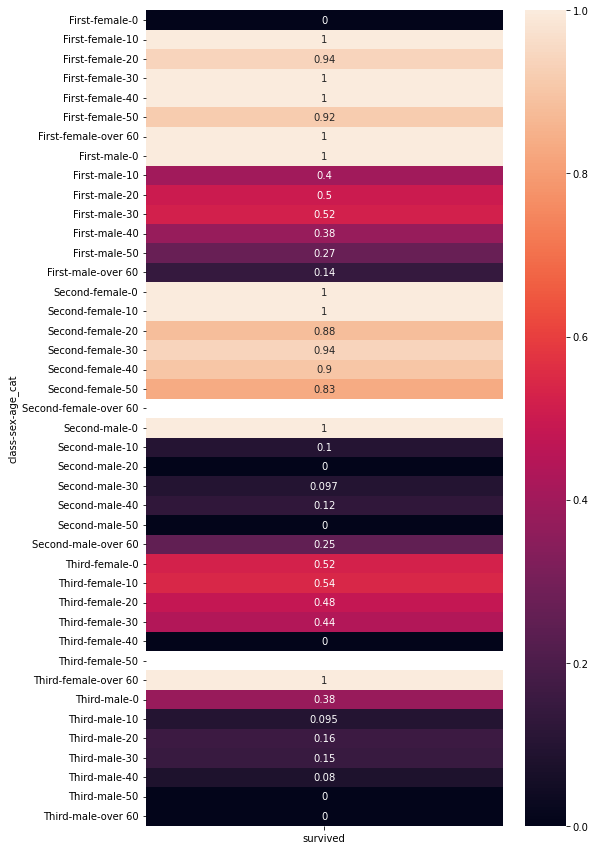

In [50]:
def get_category(age):    # 범주 만들기
    cat = ''             
    if age < 10: cat = '0'
    elif age < 20: cat = '10'
    elif age < 30: cat = '20'
    elif age < 40: cat = '30'
    elif age < 50: cat = '40'
    elif age < 60: cat = '50'
    else:
        cat = 'over 60'
    return cat
df = titanic.loc[:,['age','sex','class','survived']]
df.dropna(subset = ['age'] , inplace = True)  # age에서 NaN값 있는행 없애기
df['age_cat'] = df.age.apply(lambda x : get_category(x)) # 새로운 범주 적용
df = df.drop(['age'],axis =1)   # age 열 제거
df1 = df.groupby(['class','sex','age_cat'])   # class, sex , age_cat으로 그룹
df1.mean()    # survived 값 평균
plt.figure(figsize=(8,15))   # 데이터 시각화
sns.heatmap(df1.mean(),annot=True)

In [57]:
df1.describe()

survived                                              
                         count      mean       std  min  25%  50%   75%  max
class  sex    age_cat                                                       
First  female 0            1.0  0.000000       NaN  0.0  0.0  0.0  0.00  0.0
              10          13.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              20          16.0  0.937500  0.250000  0.0  1.0  1.0  1.00  1.0
              30          27.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              40          13.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              50          12.0  0.916667  0.288675  0.0  1.0  1.0  1.00  1.0
              over 60      3.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
       male   0            2.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              10           5.0  0.400000  0.547723  0.0  0.0  0.0  1.00  1.0
              20          18.0  0.500000  0.514496  0.0  0.0  0.5  1.00  1.0
              30          23.0  0.521739  0.510754  0.0  0.0  1.0  1.00  1.0
              40          24.0  0.375000  0.494535  0.0  0.0  0.0  1.00  1.0
              50          15.0  0.266667  0.457738  0.0  0.0  0.0  0.50  1.0
              over 60     14.0  0.142857  0.363137  0.0  0.0  0.0  0.00  1.0
Second female 0            8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              10           8.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              20          25.0  0.880000  0.331662  0.0  1.0  1.0  1.00  1.0
              30          17.0  0.941176  0.242536  0.0  1.0  1.0  1.00  1.0
              40          10.0  0.900000  0.316228  0.0  1.0  1.0  1.00  1.0
              50           6.0  0.833333  0.408248  0.0  1.0  1.0  1.00  1.0
       male   0            9.0  1.000000  0.000000  1.0  1.0  1.0  1.00  1.0
              10          10.0  0.100000  0.316228  0.0  0.0  0.0  0.00  1.0
              20          28.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
              30          31.0  0.096774  0.300537  0.0  0.0  0.0  0.00  1.0
              40           8.0  0.125000  0.353553  0.0  0.0  0.0  0.00  1.0
              50           9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
              over 60      4.0  0.250000  0.500000  0.0  0.0  0.0  0.25  1.0
Third  female 0           21.0  0.523810  0.511766  0.0  0.0  1.0  1.00  1.0
              10          24.0  0.541667  0.508977  0.0  0.0  1.0  1.00  1.0
              20          31.0  0.483871  0.508001  0.0  0.0  0.0  1.00  1.0
              30          16.0  0.437500  0.512348  0.0  0.0  0.0  1.00  1.0
              40           9.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
              over 60      1.0  1.000000       NaN  1.0  1.0  1.0  1.00  1.0
       male   0           21.0  0.380952  0.497613  0.0  0.0  0.0  1.00  1.0
              10          42.0  0.095238  0.297102  0.0  0.0  0.0  0.00  1.0
              20         102.0  0.156863  0.365467  0.0  0.0  0.0  0.00  1.0
              30          53.0  0.150943  0.361420  0.0  0.0  0.0  0.00  1.0
              40          25.0  0.080000  0.276887  0.0  0.0  0.0  0.00  1.0
              50           6.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
              over 60      4.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0

<AxesSubplot:xlabel='sex', ylabel='class-age_cat'>

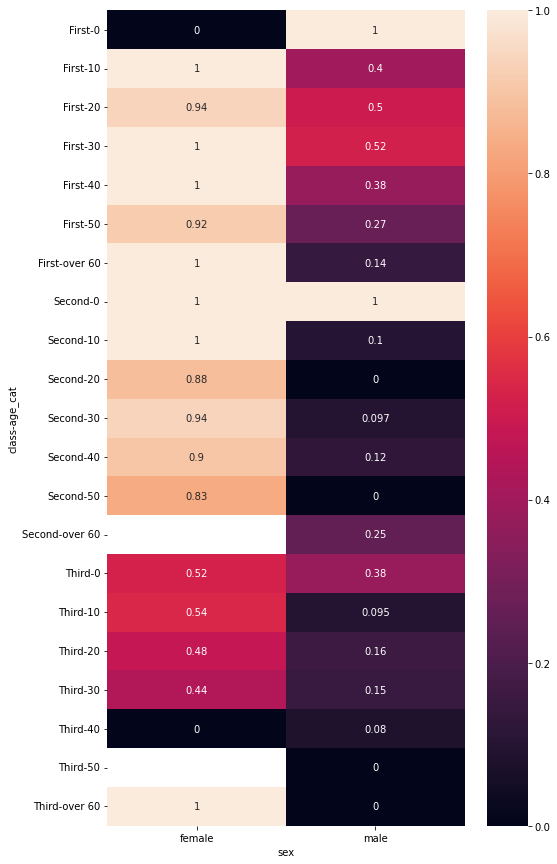

In [67]:
def get_category(age):    # 범주 만들기
    cat = ''             
    if age < 10: cat = '0'
    elif age < 20: cat = '10'
    elif age < 30: cat = '20'
    elif age < 40: cat = '30'
    elif age < 50: cat = '40'
    elif age < 60: cat = '50'
    else:
        cat = 'over 60'
    return cat
df = titanic.copy()
df.dropna(subset = ['age'] , inplace = True)  # age에서 NaN값 있는행 없애기
df['age_cat'] = df.age.apply(lambda x : get_category(x)) # 새로운 범주 적용
df = df.drop(['age'],axis =1)   # age 열 제거
pdf = pd.pivot_table(df, index = ['class','age_cat'], columns = 'sex', values = 'survived'
                    , aggfunc = 'mean')
plt.figure(figsize=(8,15))   # 데이터 시각화
sns.heatmap(pdf,annot=True)

In [72]:
def get_category(age):    # 범주 만들기
    cat = ''             
    if age < 10: cat = '0'
    elif age < 20: cat = '10'
    elif age < 30: cat = '20'
    elif age < 40: cat = '30'
    elif age < 50: cat = '40'
    elif age < 60: cat = '50'
    else:
        cat = 'over 60'
    return cat
df = titanic.copy()
df.dropna(subset = ['age'] , inplace = True)  # age에서 NaN값 있는행 없애기
df['age_cat'] = df.age.apply(lambda x : get_category(x)) # 새로운 범주 적용
df = df.drop(['age'],axis =1)   # age 열 제거

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,30
886,0,2,male,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,20
887,1,1,female,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10
889,1,1,male,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20
